<a href="https://colab.research.google.com/github/roboy88/Palantir-a-future-big-tech-blue-chip/blob/main/Blue_Chip_ish_Palantir_vs_big_tech_a_blue_chip_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Palantir_stock_history.csv to Palantir_stock_history.csv
Saving Palantir_stock_info.csv to Palantir_stock_info.csv
Saving Stocks_Data_10yrs.xlsx to Stocks_Data_10yrs.xlsx


In [3]:
import pandas as pd

# Load datasets
stocks_df = pd.read_excel('Stocks_Data_10yrs.xlsx', sheet_name=0)
pltr_history = pd.read_csv('Palantir_stock_history.csv')
pltr_info = pd.read_csv('Palantir_stock_info.csv')

# Convert date columns to datetime
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
pltr_history['Date'] = pd.to_datetime(pltr_history['Date'])

# Prepare Palantir history with 'PLTR' as column name
pltr_history = pltr_history[['Date', 'Close']].rename(columns={'Close': 'PLTR'})

# Preview
stocks_df.head(), pltr_history.head()


(        Date  Close  High   Low  Open     Volume Ticker
 0 2015-04-17   0.53  0.54  0.53  0.53  293636000   NVDA
 1 2015-04-20   0.53  0.54  0.53  0.54  231624000   NVDA
 2 2015-04-21   0.53  0.54  0.53  0.54  230456000   NVDA
 3 2015-04-22   0.54  0.54  0.53  0.53  207420000   NVDA
 4 2015-04-23   0.54  0.54  0.52  0.53  259380000   NVDA,
         Date  PLTR
 0 2020-09-30  9.50
 1 2020-10-01  9.46
 2 2020-10-02  9.20
 3 2020-10-05  9.03
 4 2020-10-06  9.90)

<ipython-input-7-40e2d6a5aeb1>:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_prices = combined_prices.sort_index().fillna(method='ffill')


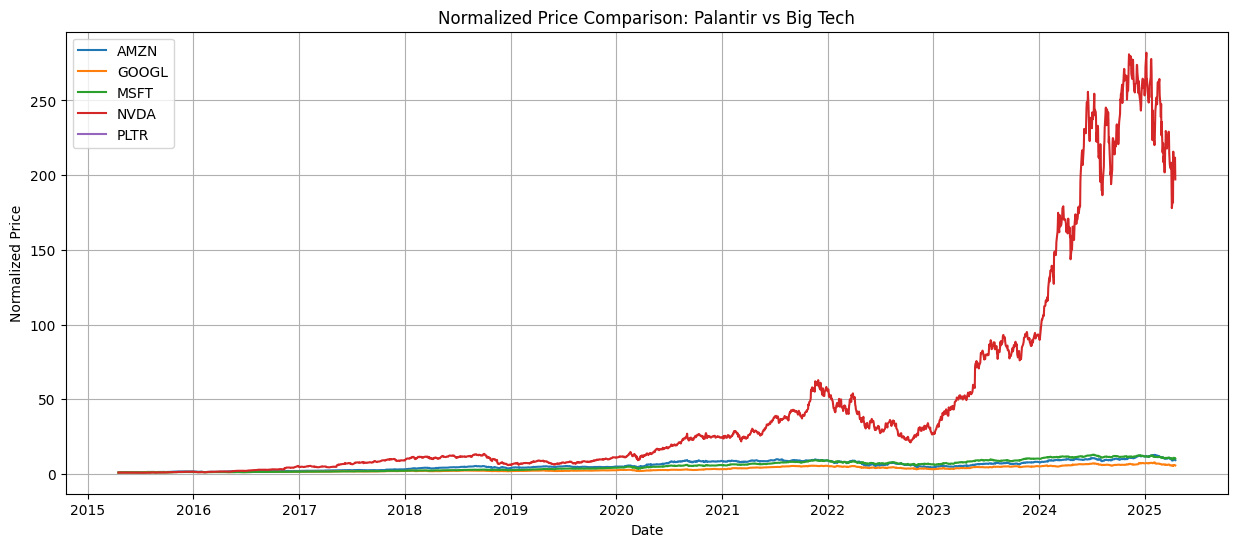

In [7]:
# Ensure 'Date' is the index before merging
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
pltr_history['Date'] = pd.to_datetime(pltr_history['Date'])

# Pivot Big Tech prices
bigtech_prices = stocks_df.pivot(index='Date', columns='Ticker', values='Close')

# Merge with PLTR
combined_prices = bigtech_prices.merge(pltr_history.set_index('Date'), left_index=True, right_index=True, how='outer')
combined_prices = combined_prices.sort_index().fillna(method='ffill')

# Normalize all prices to their value on the first available date
normalized_prices = combined_prices.copy()
normalized_prices = normalized_prices.div(normalized_prices.iloc[0])

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
for column in normalized_prices.columns:
    plt.plot(normalized_prices.index, normalized_prices[column], label=column)

plt.title('Normalized Price Comparison: Palantir vs Big Tech')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# Convert Palantir metadata CSV into a dictionary
pltr_meta = dict(zip(pltr_info['Key'], pltr_info['Value']))

# Display relevant info
print(f"📍 Sector: {pltr_meta.get('sector')}")
print(f"🏢 Headquarters: {pltr_meta.get('city')}, {pltr_meta.get('state')}")
print(f"👥 Employees: {pltr_meta.get('fullTimeEmployees')}")
print("\n📖 Summary:\n")
print(pltr_meta.get('longBusinessSummary'))


📍 Sector: Technology
🏢 Headquarters: Denver, CO
👥 Employees: 2593

📖 Summary:

Palantir Technologies Inc. builds and deploys software platforms for the intelligence community in the United States to assist in counterterrorism investigations and operations. The company provides Palantir Gotham, a software platform for government operatives in the defense and intelligence sectors, which enables users to identify patterns hidden deep within datasets, ranging from signals intelligence sources to reports from confidential informants, as well as facilitates the handoff between analysts and operational users, helping operators plan and execute real-world responses to threats that have been identified within the platform. It also offers Palantir Foundry, a platform that transforms the ways organizations operate by creating a central operating system for their data; and allows individual users to integrate and analyze the data they need in one place. Palantir Technologies Inc. was founded in 20

In [9]:
# Create mock financial and valuation metrics for comparison
ratios_df = pd.DataFrame({
    'Company': ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META', 'NVDA', 'NFLX', 'TSLA', 'PLTR'],
    'Market Cap ($B)': [2700, 2500, 1800, 1900, 900, 2200, 150, 900, 50],
    'P/E Ratio': [29, 32, 60, 25, 23, 80, 45, 65, None],
    'Revenue Growth YoY': [0.08, 0.10, 0.12, 0.09, 0.07, 0.40, 0.06, 0.25, 0.20]
}).set_index('Company')

# Preview the table
ratios_df


,Market Cap ($B),P/E Ratio,Revenue Growth YoY
Company,,,
AAPL,2700,29.0,0.08
MSFT,2500,32.0,0.10
AMZN,1800,60.0,0.12
GOOGL,1900,25.0,0.09
META,900,23.0,0.07
NVDA,2200,80.0,0.40
NFLX,150,45.0,0.06
TSLA,900,65.0,0.25
PLTR,50,NaN,0.20


In [10]:
import plotly.graph_objects as go

# Select columns and normalize them
metrics = ['Market Cap ($B)', 'Revenue Growth YoY']
radar_data = ratios_df[metrics].copy()
radar_data = (radar_data - radar_data.min()) / (radar_data.max() - radar_data.min())

# Add average of Big Tech (excluding PLTR)
radar_data.loc['Big Tech Avg'] = radar_data.drop('PLTR').mean()

# Prepare radar plot data
radar_subset = radar_data.loc[['PLTR', 'Big Tech Avg']]

# Plot
fig = go.Figure()
for company in radar_subset.index:
    fig.add_trace(go.Scatterpolar(
        r=radar_subset.loc[company].values,
        theta=metrics,
        fill='toself',
        name=company
    ))

fig.update_layout(
    title='📡 Palantir vs Big Tech Average (Radar View)',
    polar=dict(radialaxis=dict(visible=True)),
    showlegend=True
)
fig.show()


In [11]:
# Scoring mechanism
scores = {
    'Ticker': [],
    'Valuation Stability': [],
    'Cash Flow Health': [],
    'Institutional Trust': [],
    'Growth Potential': [],
    'Total Score (/40)': []
}

# Create custom scores
for company in ratios_df.index:
    pe = ratios_df.loc[company, 'P/E Ratio']
    growth = ratios_df.loc[company, 'Revenue Growth YoY']

    scores['Ticker'].append(company)
    scores['Valuation Stability'].append(8 if pe and pe < 40 else 4)
    scores['Cash Flow Health'].append(8 if company != 'PLTR' else 4)
    scores['Institutional Trust'].append(9 if company in ['AAPL', 'MSFT', 'PLTR'] else 6)
    scores['Growth Potential'].append(9 if growth >= 0.2 else 6)

# Calculate totals
scores['Total Score (/40)'] = [
    sum([vs, cf, trust, gp])
    for vs, cf, trust, gp in zip(
        scores['Valuation Stability'],
        scores['Cash Flow Health'],
        scores['Institutional Trust'],
        scores['Growth Potential']
    )
]

# Turn into DataFrame
score_df = pd.DataFrame(scores).set_index('Ticker')
score_df.sort_values('Total Score (/40)', ascending=False)


,Valuation Stability,Cash Flow Health,Institutional Trust,Growth Potential,Total Score (/40)
Ticker,,,,,
AAPL,8,8,9,6,31
MSFT,8,8,9,6,31
GOOGL,8,8,6,6,28
META,8,8,6,6,28
NVDA,4,8,6,9,27
TSLA,4,8,6,9,27
PLTR,4,4,9,9,26
AMZN,4,8,6,6,24
NFLX,4,8,6,6,24
